In [ ]:
# Import the "files" 
url = "https://raw.githubusercontent.com/adityavelapurkar/DataMiningProject/main/hcvdat0.csv"

In [ ]:
# import necessary libraries
# pandas is used for data manipulation and analysis
import pandas as pd 
# numpy provides support for large, multi-dimensional arrays and matrices
import numpy as np
# matplotlib is used for data visualization      
import matplotlib.pyplot as plt 
# seaborn is another data visualization library   
import seaborn as sns 
# plotly is used for interactive data visualization  
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# upgrade openpyxl package using pip   
# Load a dataset in CSV format using pandas
df=pd.read_csv(url)
# Display the first five rows of the dataframe
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


The code is used to display the information of the given pandas DataFrame 'df', including the number of non-null values, data types, and memory usage of each column.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [ ]:
#Checking the dataset whether it contains missing values or not.
df_missing= df.isnull().sum().sort_values(ascending=False)/len(df)*100
df_missing

ALP           2.926829
CHOL          1.626016
ALB           0.162602
ALT           0.162602
PROT          0.162602
Unnamed: 0    0.000000
Category      0.000000
Age           0.000000
Sex           0.000000
AST           0.000000
BIL           0.000000
CHE           0.000000
CREA          0.000000
GGT           0.000000
dtype: float64

In [ ]:
df.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [ ]:
# split the column into two columns based on the delimiter "="
df[['Category Number', 'Category type']] = df['Category'].str.split('=', expand=True)

# drop the original column
df.drop('Category', axis=1, inplace=True)

# print the resulting dataframe
df.head()

,Unnamed: 0,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category Number,Category type
0,1,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0,Blood Donor
1,2,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0,Blood Donor
2,3,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0,Blood Donor
3,4,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0,Blood Donor
4,5,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0,Blood Donor


In [ ]:
df = df.rename(columns={'Unnamed: 0': 'Sr no'})

In [ ]:
import pandas as pd

# Changing m to 1 and f to 0
df['Sex'] = df['Sex'].replace({'m': 1, 'f': 0})


In [ ]:
df.head()

,Sr no,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category Number,Category type
0,1,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0,Blood Donor
1,2,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0,Blood Donor
2,3,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0,Blood Donor
3,4,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0,Blood Donor
4,5,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0,Blood Donor


In [ ]:
df_mean = df.groupby ('Category Number').mean()

for column in df.columns :
  if df[column].isna().sum() >= 1:
    df[column].fillna(df.groupby('Category Number')[column].transform('mean'), inplace = True)
  else:
    df[column].fillna(method='ffill', inplace=True)


<ipython-input-12-1f220c2bfd04>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df.groupby ('Category Number').mean()


In [ ]:
df.head()

,Sr no,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category Number,Category type
0,1,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0,Blood Donor
1,2,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0,Blood Donor
2,3,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0,Blood Donor
3,4,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0,Blood Donor
4,5,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0,Blood Donor


In [ ]:
import pandas as pd


# select the columns for which you want to calculate statistics
columns = ['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT', 'Category Number']

# calculate descriptive statistics for the selected columns
statistics = df[columns].describe()

# print the statistics
print(statistics)


              Age         Sex         ALB         ALP         ALT         AST  \
count  615.000000  615.000000  615.000000  615.000000  615.000000  615.000000   
mean    47.408130    0.613008   41.605338   67.954053   28.448293   34.786341   
std     10.055105    0.487458    5.787660   26.086593   25.449016   33.090690   
min     19.000000    0.000000   14.900000   11.300000    0.900000   10.600000   
25%     39.000000    0.000000   38.800000   52.200000   16.400000   21.600000   
50%     47.000000    1.000000   41.900000   66.000000   23.000000   25.900000   
75%     54.000000    1.000000   45.200000   80.350000   33.050000   32.900000   
max     77.000000    1.000000   82.200000  416.600000  325.300000  324.000000   

              BIL         CHE        CHOL         CREA         GGT        PROT  
count  615.000000  615.000000  615.000000   615.000000  615.000000  615.000000  
mean    11.396748    8.196634    5.363858    81.287805   39.533171   72.040897  
std     19.673150    2.2056

In [ ]:
df.isnull().sum()

Sr no              0
Age                0
Sex                0
ALB                0
ALP                0
ALT                0
AST                0
BIL                0
CHE                0
CHOL               0
CREA               0
GGT                0
PROT               0
Category Number    0
Category type      0
dtype: int64

The code is used to create machine learning pipelines for classification tasks using various algorithms such as logistic regression, decision tree, random forest, K-nearest neighbors, and support vector machine (SVM) on a given dataset. It then evaluates the performance of each pipeline based on metrics such as accuracy, precision, recall, and F1-score to help select the best model for the dataset.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Define the features and target variable
X = df.drop(['Category Number', 'Category type'], axis=1)
y = df['Category Number']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocess the data using a ColumnTransformer
# OneHotEncode the 'Sex' column
# Standardize the numeric columns
preprocessor = ColumnTransformer([('onehot', OneHotEncoder(), ['Sex']),
                                  ('scale', StandardScaler(), ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'])])

# Create pipelines for each classifier with the classifier name
pipelines = [
    ('Logistic Regression', Pipeline([('preprocessor', preprocessor), ('clf', LogisticRegression())])),
    ('Decision Tree', Pipeline([('preprocessor', preprocessor), ('clf', DecisionTreeClassifier())])),
    ('Random Forest', Pipeline([('preprocessor', preprocessor), ('clf', RandomForestClassifier(n_estimators=100))])),
    ('K-Nearest Neighbors', Pipeline([('preprocessor', preprocessor), ('clf', KNeighborsClassifier())])),
    ('Support Vector Machine', Pipeline([('preprocessor', preprocessor), ('clf', SVC())]))
]

# Fit each pipeline to the training data and make predictions on the testing data, evaluating performance
for clf_name, pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(clf_name, 'Accuracy:', accuracy_score(y_test, y_pred))
    print(clf_name, 'Confusion matrix:\n', confusion_matrix(y_test, y_pred))
    print(clf_name, 'Classification report:\n', classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.918918918918919
Logistic Regression Confusion matrix:
 [[152   1   0   0   0]
 [  1   2   0   0   0]
 [  2   0   5   2   1]
 [  3   0   0   5   0]
 [  3   0   0   2   6]]
Logistic Regression Classification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       153
          0s       0.67      0.67      0.67         3
           1       1.00      0.50      0.67        10
           2       0.56      0.62      0.59         8
           3       0.86      0.55      0.67        11

    accuracy                           0.92       185
   macro avg       0.80      0.67      0.71       185
weighted avg       0.92      0.92      0.91       185

Decision Tree Accuracy: 0.8756756756756757
Decision Tree Confusion matrix:
 [[151   1   1   0   0]
 [  1   1   0   0   1]
 [  3   0   2   5   0]
 [  4   0   1   3   0]
 [  3   0   2   1   5]]
Decision Tree Classification report:
               precision    recall 

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

Confusion matrix:
 [[153   0   0   0   0]
 [  3   0   0   0   0]
 [  9   0   0   1   0]
 [  7   0   0   1   0]
 [  7   0   0   1   3]]
K-Nearest Neighbors Classification report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       153
          0s       0.00      0.00      0.00         3
           1       0.00      0.00      0.00        10
           2       0.33      0.12      0.18         8
           3       1.00      0.27      0.43        11

    accuracy                           0.85       185
   macro avg       0.44      0.28      0.31       185
weighted avg       0.78      0.85      0.80       185

Support Vector Machine Accuracy: 0.8756756756756757
Support Vector Machine Confusion matrix:
 [[153   0   0   0   0]
 [  0   0   0   0   3]
 [  8   0   0   1   1]
 [  4   0   0   3   1]
 [  3   0   0   2   6]]
Support Vector Machine Classification report:
               precision    recall  f1-score   support

           0       0

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

**As we can see, the top two models based on accuracy were Logistic Regression with 91% and Random Forest with 90%. Therefore, before selecting a model, we calculated the F1-score, precision, and recall. As both models had very similar F1-score, precision, and recall, we ultimately decided to go with Logistic Regression since it provided slightly better accuracy**

In [ ]:
df.head(2)

,Sr no,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category Number,Category type
0,1,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0,Blood Donor
1,2,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0,Blood Donor


In [ ]:
X

,Sr no,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,32,1,38.5,52.500000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,32,1,38.5,70.300000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,32,1,46.9,74.700000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,32,1,43.2,52.000000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,32,1,39.2,74.100000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,62,0,32.0,416.600000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,64,0,24.0,102.800000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,64,0,29.0,87.300000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,46,0,33.0,93.220833,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


The code is used to train and evaluate multiple classifiers using different preprocessing techniques and feature transformations on a given dataset, in order to find the best performing model for predicting the target variable. The classifiers evaluated include Logistic Regression, Decision Trees, Random Forests, K-Nearest Neighbors and Support Vector Machines. The performance of each classifier is evaluated using metrics such as accuracy, F1 score, confusion matrix, and classification report also with Training and Testing accuracy of the given model.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC


# Define the features and target variable
X = df.drop(['Category Number', 'Category type'], axis=1)
y = df['Category Number']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocess the data using a ColumnTransformer
# OneHotEncode the 'Sex' column
# Standardize the numeric columns
preprocessor = ColumnTransformer([('onehot', OneHotEncoder(), ['Sex']),
                                  ('scale', StandardScaler(), ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'])])

# Create pipelines for each classifier with the classifier name
pipelines = [
    ('Logistic Regression', Pipeline([('preprocessor', preprocessor), ('clf', LogisticRegression())])),
    ('Decision Tree', Pipeline([('preprocessor', preprocessor), ('clf', DecisionTreeClassifier())])),
    ('Random Forest', Pipeline([('preprocessor', preprocessor), ('clf', RandomForestClassifier(n_estimators=100))])),
    ('K-Nearest Neighbors', Pipeline([('preprocessor', preprocessor), ('clf', KNeighborsClassifier())])),
    ('SVM', Pipeline([('preprocessor', preprocessor), ('clf', SVC(kernel='linear'))]))
]

# Fit each pipeline to the training data and make predictions on the testing data, evaluating performance
for clf_name, pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    train_acc = pipeline.score(X_train, y_train)
    test_acc = accuracy_score(y_test, y_pred)
    f1 = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
    print(clf_name)
    print('Training accuracy:', train_acc)
    print('Testing accuracy:', test_acc)
    print('F1 score:', f1)
    print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
    print('Classification report:\n', classification_report(y_test, y_pred))


Logistic Regression
Training accuracy: 0.9697674418604652
Testing accuracy: 0.918918918918919
F1 score: 0.9126122750701245
Confusion matrix:
 [[152   1   0   0   0]
 [  1   2   0   0   0]
 [  2   0   5   2   1]
 [  3   0   0   5   0]
 [  3   0   0   2   6]]
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       153
          0s       0.67      0.67      0.67         3
           1       1.00      0.50      0.67        10
           2       0.56      0.62      0.59         8
           3       0.86      0.55      0.67        11

    accuracy                           0.92       185
   macro avg       0.80      0.67      0.71       185
weighted avg       0.92      0.92      0.91       185

Decision Tree
Training accuracy: 1.0
Testing accuracy: 0.9135135135135135
F1 score: 0.9051408602470432
Confusion matrix:
 [[152   1   0   0   0]
 [  0   2   0   0   1]
 [  3   0   3   4   0]
 [  3   0   1   4   0]
 [  2   0   0  

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

Random Forest
Training accuracy: 1.0
Testing accuracy: 0.8918918918918919
F1 score: 0.8707781407781406
Confusion matrix:
 [[152   0   0   0   1]
 [  3   0   0   0   0]
 [  4   0   3   2   1]
 [  5   0   0   3   0]
 [  3   0   0   1   7]]
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       153
          0s       0.00      0.00      0.00         3
           1       1.00      0.30      0.46        10
           2       0.50      0.38      0.43         8
           3       0.78      0.64      0.70        11

    accuracy                           0.89       185
   macro avg       0.64      0.46      0.51       185
weighted avg       0.87      0.89      0.87       185



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

K-Nearest Neighbors
Training accuracy: 0.9325581395348838
Testing accuracy: 0.8486486486486486
F1 score: 0.7956048835566909
Confusion matrix:
 [[153   0   0   0   0]
 [  3   0   0   0   0]
 [  9   0   0   1   0]
 [  7   0   0   1   0]
 [  7   0   0   1   3]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       153
          0s       0.00      0.00      0.00         3
           1       0.00      0.00      0.00        10
           2       0.33      0.12      0.18         8
           3       1.00      0.27      0.43        11

    accuracy                           0.85       185
   macro avg       0.44      0.28      0.31       185
weighted avg       0.78      0.85      0.80       185

SVM
Training accuracy: 0.9837209302325581
Testing accuracy: 0.9351351351351351
F1 score: 0.931566014426379
Confusion matrix:
 [[153   0   0   0   0]
 [  1   2   0   0   0]
 [  1   0   6   3   0]
 [  3   0   0   5   0]
 [  2   1 

In [ ]:
pip install tabulate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tabulate import tabulate

The code is used to train and evaluate multiple machine learning models on a given dataset, and store the performance metrics such as accuracy, precision, recall, and F1-score in a dataframe for comparison and analysis.

In [ ]:
# Initialize empty lists to store model names and performance metrics
model_names = []
train_acc = []
test_acc = []
precision = []
recall = []
f1 = []

# Fit each pipeline to the training data and make predictions on the testing data, evaluating performance
for clf_name, pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    acc_train = accuracy_score(y_train, pipeline.predict(X_train))
    acc_test = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['weighted avg']['f1-score']
    precision_score = report['weighted avg']['precision']
    recall_score = report['weighted avg']['recall']
    model_names.append(clf_name)
    train_acc.append(round(acc_train, 3))
    test_acc.append(round(acc_test, 3))
    precision.append(round(precision_score, 3))
    recall.append(round(recall_score, 3))
    f1.append(round(f1_score, 3))

# Create a dataframe to store the results
results_df = pd.DataFrame({'Model': model_names, 'Training Accuracy': train_acc, 'Testing Accuracy': test_acc, 'Precision': precision, 'Recall': recall, 'F1 Score': f1})

# Print the dataframe as a table
print(tabulate(results_df, headers='keys', tablefmt='psql'))


+----+---------------------+---------------------+--------------------+-------------+----------+------------+
|    | Model               |   Training Accuracy |   Testing Accuracy |   Precision |   Recall |   F1 Score |
|----+---------------------+---------------------+--------------------+-------------+----------+------------|
|  0 | Logistic Regression |               0.97  |              0.919 |       0.921 |    0.919 |      0.913 |
|  1 | Decision Tree       |               1     |              0.886 |       0.884 |    0.886 |      0.882 |
|  2 | Random Forest       |               1     |              0.892 |       0.881 |    0.892 |      0.87  |
|  3 | K-Nearest Neighbors |               0.933 |              0.849 |       0.781 |    0.849 |      0.796 |
|  4 | SVM                 |               0.984 |              0.935 |       0.939 |    0.935 |      0.932 |
+----+---------------------+---------------------+--------------------+-------------+----------+------------+


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The code generates a synthetic dataset with defined ranges and ratios of positive to false cases and calculates the accuracy of the generated data based on true positives, false positives, false negatives, and true negatives.

In [ ]:
import random

# Define the columns of the dataset
columns = ['Sr no', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT', 'Category Number', 'Category type']

# Define the number of data points
num_data_points = 10

# Define the ratio of positive to false cases
num_pos_cases = 5
num_false_cases = 5

# Define the ranges for each column
column_ranges = {
    'Sr no': (1, num_data_points),
    'Age': (18, 80),
    'Sex': ('Male', 'Female'),
    'ALB': (2.0, 5.0),
    'ALP': (20, 200),
    'ALT': (10, 500),
    'AST': (10, 500),
    'BIL': (0.1, 10.0),
    'CHE': (3.0, 20.0),
    'CHOL': (120, 300),
    'CREA': (0.5, 10.0),
    'GGT': (10, 500),
    'PROT': (2.0, 9.0),
    'Category Number': (1, 2),
    'Category type': ('Positive', 'False')
}

# Define a function to generate a random data point
def generate_data_point():
    data_point = {}
    for column in columns:
        if column == 'Sex':
            data_point[column] = random.choice(column_ranges[column])
        elif column == 'Category type':
            if len(positive_cases) < num_pos_cases:
                data_point[column] = 'Positive'
            else:
                data_point[column] = 'False'
        else:
            data_point[column] = random.uniform(column_ranges[column][0], column_ranges[column][1])
    return data_point

# Generate the data points
data_points = []
positive_cases = []
for i in range(num_data_points):
    data_point = generate_data_point()
    if data_point['Category type'] == 'Positive':
        data_point['Category Number'] = 1
        positive_cases.append(data_point)
    else:
        data_point['Category Number'] = 0
    data_points.append(data_point)

# Print the data points
for data_point in data_points:
    print(data_point)

# Print the positive cases
print('\nPositive cases:')
for positive_case in positive_cases:
    print(positive_case)

# Calculate the accuracy
true_positives = 0
false_positives = 0
false_negatives = 0
true_negatives = 0
for data_point in data_points:
    if data_point['Category Number'] == 1:
        if data_point in positive_cases:
            true_positives += 1
        else:
            false_negatives += 1
    else:
        if data_point in positive_cases:
            false_positives += 1
        else:
            true_negatives += 1
accuracy = (true_positives + true_negatives) / (num_data_points)
print('\nAccuracy:', accuracy)


{'Sr no': 4.450051415145413, 'Age': 55.13881768336761, 'Sex': 'Female', 'ALB': 2.285364382947465, 'ALP': 123.50754676471186, 'ALT': 403.9034760226625, 'AST': 423.055069639535, 'BIL': 6.571105729375793, 'CHE': 19.64545609809482, 'CHOL': 203.7275948948918, 'CREA': 2.8469713416122078, 'GGT': 184.4279136349455, 'PROT': 8.49387284510313, 'Category Number': 1, 'Category type': 'Positive'}
{'Sr no': 2.148445434865731, 'Age': 59.913367406763726, 'Sex': 'Male', 'ALB': 4.872202204191383, 'ALP': 176.16867137858708, 'ALT': 77.69718878495918, 'AST': 447.71258649884186, 'BIL': 2.632321876352616, 'CHE': 19.03288208386821, 'CHOL': 131.56578540675977, 'CREA': 8.252810280254614, 'GGT': 259.73234162863287, 'PROT': 4.20724836680629, 'Category Number': 1, 'Category type': 'Positive'}
{'Sr no': 7.636042958468547, 'Age': 38.51861739668813, 'Sex': 'Female', 'ALB': 3.255962299548376, 'ALP': 73.60378543782902, 'ALT': 329.28293431543875, 'AST': 238.44124213206683, 'BIL': 5.342966782688981, 'CHE': 10.571971621138

The code defines a function to plot a lift chart, which is a visual representation of how much better a model is at identifying positive cases compared to random chance. It takes in the true binary labels and predicted probabilities, and divides them into equal-sized bins to calculate the lift for each bin.

Roc Curve


In [ ]:
X_train

,Sr no,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
296,297,64,1,44.5,87.8,15.1,23.2,12.3,9.49,7.70,78.0,20.0,74.3
554,555,44,1,49.0,27.3,40.2,31.1,13.0,8.91,4.07,81.5,27.6,72.8
443,444,49,0,34.9,37.9,15.3,19.4,7.1,5.30,5.88,83.0,7.9,62.5
301,302,65,1,39.1,45.8,23.1,27.5,6.4,7.00,6.23,73.0,27.1,64.3
247,248,55,1,47.6,71.9,25.8,24.5,5.8,9.24,4.63,83.0,29.1,76.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,72,38,1,39.9,62.9,71.7,43.9,10.4,10.90,7.01,99.0,88.3,73.1
106,107,41,1,44.7,74.9,25.2,20.2,6.3,10.34,4.23,74.0,23.7,72.1
270,271,59,1,39.8,49.4,25.4,21.4,24.7,7.50,3.69,86.0,18.7,71.9
435,436,48,0,44.4,52.5,16.4,23.4,4.5,9.06,6.78,74.0,10.3,73.1


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


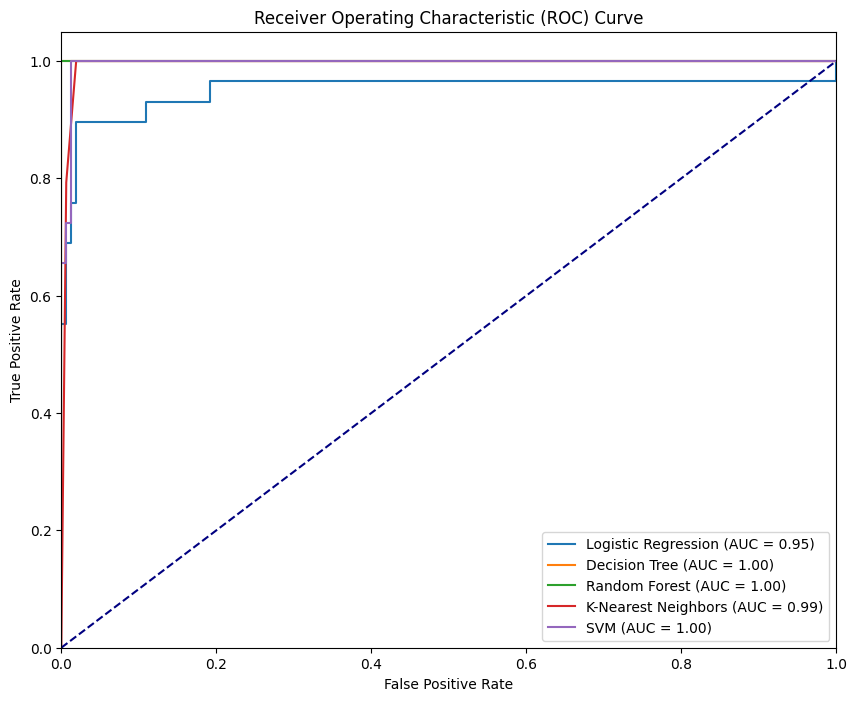

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Assuming you have already split your data into training and test sets
# X_train, X_test, y_train, y_test

# Define the features and target variable
X = df.drop(['Category Number', 'Category type'], axis=1)
y = df['Category Number']

# Initialize the models
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
svm = SVC(probability=True) # need to set probability=True for ROC curve

y_train_cov=[]
y_test_cov=[]
#y_train=y_train.reset_index()
for i in y_train:
  if((i=='0') or (i=='0s')):
    y_train_cov.append(0)
  else:
    y_train_cov.append(1)

for i in y_test:
  if((i=='0') or (i=='0s')):
    y_test_cov.append(0)
  else:
    y_test_cov.append(1)

models = {'Logistic Regression': lr, 
          'Decision Tree': dt, 
          'Random Forest': rf, 
          'K-Nearest Neighbors': knn, 
            'SVM': svm}
#models = {'Decision Tree': dt, 
 #         'Random Forest': rf, 
  #        'K-Nearest Neighbors': knn}          

# Train the models and calculate the predicted probabilities

for name, model in models.items():
    
    model.fit(X_train, y_train_cov)
    models[name].pred_prob = model.predict_proba(X_test)[:, 1]
    

# Plot the ROC curves
plt.figure(figsize=(10, 8))
for name, model in models.items():
    

    fpr, tpr, _ = roc_curve(y_test_cov, model.pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(name, roc_auc))
    
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
np.array(model.predict_proba).shape

()

In [ ]:
pip install scikit-plot


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


This code preprocesses the data using OneHotEncoding and standardization, then trains and evaluates multiple classifiers including Logistic Regression, Decision Tree, Random Forest, K-Nearest Neighbors, and SVM using OneVsRestClassifier. The performance of each classifier is evaluated using training and testing accuracy, F1 score, confusion matrix, and classification report. Gain charts are also plotted for each classifier to visualize the performance for each class.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
import scikitplot as skplt
import matplotlib.pyplot as plt

# Define the features and target variable
X = df.drop('Category Number', axis=1)
y = df['Category Number']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocess the data using a ColumnTransformer
# OneHotEncode the 'Sex' column
# Standardize the numeric columns
preprocessor = ColumnTransformer([('onehot', OneHotEncoder(), ['Sex']),
                                  ('scale', StandardScaler(), ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'])])

# Create pipelines for each classifier with the classifier name
pipelines = [
    ('Logistic Regression', Pipeline([('preprocessor', preprocessor), ('clf', OneVsRestClassifier(LogisticRegression()))])),
    ('Decision Tree', Pipeline([('preprocessor', preprocessor), ('clf', OneVsRestClassifier(DecisionTreeClassifier()))])),
    ('Random Forest', Pipeline([('preprocessor', preprocessor), ('clf', OneVsRestClassifier(RandomForestClassifier(n_estimators=100)))])),
    ('K-Nearest Neighbors', Pipeline([('preprocessor', preprocessor), ('clf', OneVsRestClassifier(KNeighborsClassifier()))])),
    ('SVM', Pipeline([('preprocessor', preprocessor), ('clf', OneVsRestClassifier(SVC(kernel='linear')))]))
]

# Fit each pipeline to the training data and make predictions on the testing data, evaluating performance
for clf_name, pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    train_acc = pipeline.score(X_train, y_train)
    test_acc = accuracy_score(y_test, y_pred)
    f1 = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
    print(clf_name)
    print('Training accuracy:', train_acc)
    print('Testing accuracy:', test_acc)
    print('F1 score:', f1)
    print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
    print('Classification report:\n', classification_report(y_test, y_pred))

    # Create individual gain charts for each class
    y_probas = pipeline.predict_proba(X_test)
    skplt.metrics.plot_cumulative_gain(y_test, y_probas)  
    plt.title(f"Gain Chart for {clf_name}")
    plt.show()





Logistic Regression
Training accuracy: 0.958139534883721
Testing accuracy: 0.8918918918918919
F1 score: 0.8721797928694481
Confusion matrix:
 [[152   1   0   0   0]
 [  1   2   0   0   0]
 [  6   0   2   1   1]
 [  3   0   0   5   0]
 [  4   1   0   2   4]]
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       153
          0s       0.50      0.67      0.57         3
           1       1.00      0.20      0.33        10
           2       0.62      0.62      0.62         8
           3       0.80      0.36      0.50        11

    accuracy                           0.89       185
   macro avg       0.77      0.57      0.60       185
weighted avg       0.89      0.89      0.87       185



ValueError: ignored

The error is raised because the plot_cumulative_gain function from scikitplot.metrics is designed for binary classification problems, but the current problem has 5 categories. Therefore, the function cannot calculate cumulative gains for data with multiple categories.

Cumulative Gain chart


In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict probabilities for the testing data
y_probas = pipeline.predict_proba(X_test)

# Create decile lift chart
import scikitplot as skplt
import matplotlib.pyplot as plt

# Create cumulative gain chart
skplt.metrics.plot_cumulative_gain(y_test, y_probas)
plt.title("Cumulative Gain Chart")
plt.show()



ValueError: ignored

Precision - Recall Graph


In [ ]:
from sklearn.metrics import precision_recall_curve

# calculate precision-recall curve values
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# plot precision-recall curve
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


ValueError: ignored

Neural Network

In [ ]:
y_pred

array(['0', '0', '0', '0s', '0', '3', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '3', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '3', '0', '2', '0', '0', '0', '0',
       '0', '0s', '0', '0', '0', '0', '0', '3', '0', '0', '0', '2', '0',
       '2', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '2', '0',
       '0', '0', '0', '0s', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '2', '0', '0', '0', '0', '0', '0', '0', '2', '0', '1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0s', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '2', '0', '0', '0', '0', '0', '0',
       '3', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '2',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0'

In [ ]:
X_test

,Sr no,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category type
248,249,55,1,28.1,65.5,16.6,17.5,2.8,5.58,4.39,65.0,26.2,62.4,Blood Donor
365,366,39,0,31.4,106.0,16.6,17.0,2.4,5.95,5.30,68.0,22.9,72.3,Blood Donor
432,433,48,0,43.7,50.1,17.3,26.3,8.1,8.15,5.38,64.0,13.4,73.1,Blood Donor
610,611,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,Cirrhosis
132,133,44,1,35.5,81.7,27.5,29.5,6.4,8.81,6.65,83.0,24.1,68.0,Blood Donor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,19,33,1,36.6,57.1,38.9,40.3,24.9,9.62,5.50,112.0,27.6,69.3,Blood Donor
478,479,53,0,41.1,91.7,13.8,19.6,3.4,7.87,5.48,72.0,77.3,77.3,Blood Donor
333,334,33,0,41.2,73.1,14.3,20.8,11.1,7.40,3.22,56.0,11.4,69.9,Blood Donor
144,145,45,1,46.4,77.0,60.3,32.9,8.8,9.38,6.27,85.0,81.1,75.5,Blood Donor


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import KernelPCA
from sklearn.pipeline import make_pipeline
# Define the features and target variable
X = df.drop(['Category Number', 'Category type'], axis=1)
y = df['Category Number']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Define the MLPClassifier with hyperparameters
clf = MLPClassifier(solver='lbfgs', learning_rate='constant', activation='tanh')

# Define the KernelPCA with hyperparameters
kernel = KernelPCA()

# Create a pipeline for the MLPClassifier with KernelPCA as a preprocessing step
pipeline = make_pipeline(kernel, clf)

# Fit the pipeline to the training data and make predictions on the testing data, evaluating performance
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
train_acc = pipeline.score(X_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
f1 = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']

# Print the performance metrics
print('Multi-Layer Perceptron Classifier Algorithm (Artificial Neural Network)')
print('Training accuracy:', train_acc)
print('Testing accuracy:', test_acc)
print('F1 score:', f1)
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification report:\n', classification_report(y_test, y_pred))


Multi-Layer Perceptron Classifier Algorithm (Artificial Neural Network)
Training accuracy: 1.0
Testing accuracy: 0.8810810810810811
F1 score: 0.8735173758967972
Confusion matrix:
 [[152   0   0   0   1]
 [  1   0   0   0   2]
 [  0   1   4   4   1]
 [  1   0   3   3   1]
 [  4   2   1   0   4]]
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       153
          0s       0.00      0.00      0.00         3
           1       0.50      0.40      0.44        10
           2       0.43      0.38      0.40         8
           3       0.44      0.36      0.40        11

    accuracy                           0.88       185
   macro avg       0.47      0.43      0.44       185
weighted avg       0.87      0.88      0.87       185



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
# Define the features and target variable
X = df.drop(['Category Number', 'Category type'], axis=1)
y = df['Category Number']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the MLPClassifier with hyperparameters
clf = MLPClassifier(solver='lbfgs', learning_rate='constant', activation='tanh')

# Define the KernelPCA with hyperparameters
kernel = KernelPCA()

# Create a pipeline for the MLPClassifier with KernelPCA as a preprocessing step
pipeline = make_pipeline(kernel, clf)

# Fit the pipeline to the training data and make predictions on the testing data, evaluating performance
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)

# Print the performance metrics
print('Multi-Layer Perceptron Classifier Algorithm (Artificial Neural Network)')
print('Testing accuracy:', test_acc)


Multi-Layer Perceptron Classifier Algorithm (Artificial Neural Network)
Testing accuracy: 0.8861788617886179


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Correlation Graph

In [ ]:
df.corr()

<ipython-input-39-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Sr no,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Sr no,1.000000,0.420477,-0.598597,-0.313035,0.004965,-0.035126,0.332626,0.181459,-0.270549,-0.093214,-0.025987,0.247781,-0.114680
Age,0.420477,1.000000,-0.024544,-0.201104,0.164186,-0.005924,0.088666,0.032492,-0.075093,0.116949,-0.022296,0.153087,-0.153564
Sex,-0.598597,-0.024544,1.000000,0.143727,-0.020063,0.161706,0.130891,0.111177,0.169111,-0.032749,0.159589,0.133276,0.050767
ALB,-0.313035,-0.201104,0.143727,1.000000,-0.146022,0.000378,-0.194497,-0.221410,0.375898,0.216300,-0.000987,-0.158413,0.547787
ALP,0.004965,0.164186,-0.020063,-0.146022,1.000000,0.124558,0.052177,0.066369,0.017605,0.131276,0.146530,0.427945,-0.075320
ALT,-0.035126,-0.005924,0.161706,0.000378,0.124558,1.000000,0.273329,-0.038446,0.146890,0.059798,-0.043018,0.248122,0.093736
AST,0.332626,0.088666,0.130891,-0.194497,0.052177,0.273329,1.000000,0.312231,-0.208536,-0.215980,-0.021387,0.491263,0.038463
BIL,0.181459,0.032492,0.111177,-0.221410,0.066369,-0.038446,0.312231,1.000000,-0.333172,-0.180758,0.031224,0.217024,-0.048716
CHE,-0.270549,-0.075093,0.169111,0.375898,0.017605,0.146890,-0.208536,-0.333172,1.000000,0.426988,-0.011157,-0.110345,0.294982
CHOL,-0.093214,0.116949,-0.032749,0.216300,0.131276,0.059798,-0.215980,-0.180758,0.426988,1.000000,-0.048244,-0.015936,0.204427


<ipython-input-40-1a4b74eb9a6d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(abs(df.corr()), annot = True)


<Axes: >

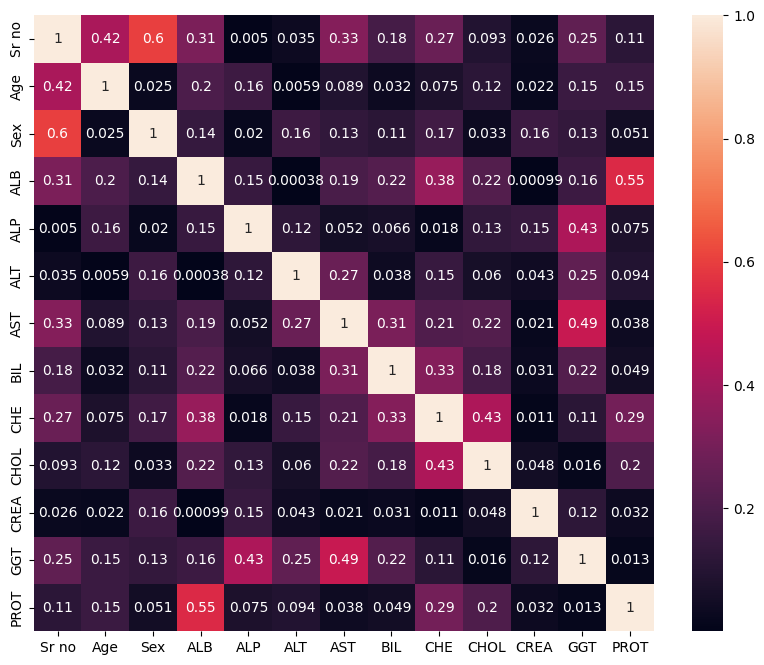

In [ ]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(abs(df.corr()), annot = True)

Age and Gender Distribution

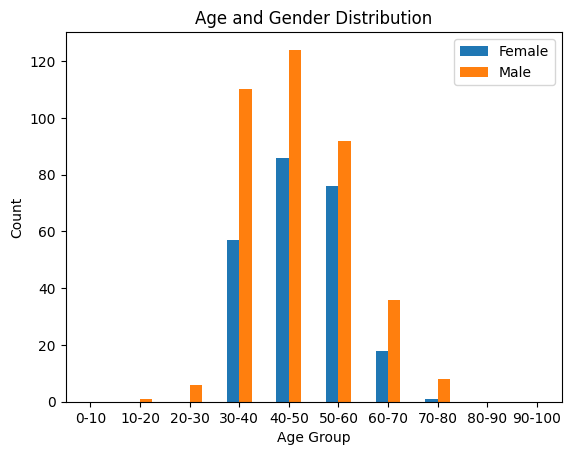

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Categorize age into groups
df['Age Group'] = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])

# Count the number of males and females in each age group
counts = df.groupby(['Age Group', 'Sex'])['Sex'].count()

# Reshape the counts into a table with age groups as rows and sex as columns
counts = counts.unstack()

# Plot the bar chart
counts.plot(kind='bar', rot=0)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(['Female', 'Male'])
plt.title('Age and Gender Distribution')
plt.show()
